# Matrix Representations Of Networks

When we work with networks, we need a way to represent them mathematically and in our code. A network itself lives in network space, which is just the set of all possible networks. Network space is kind of abstract and inconvenient if we want to use traditional mathematics, so we'd generally like to represent networks with groups of numbers to make everything more concrete.

More specifically, we would often like to represent networks with *matrices*. In addition to being computationally convenient, using matrices to represent networks lets us bring in a surprising amount of tools from linear algebra and statistics. Programmatically, using matrices also lets us use common Python tools for array manipulation like numpy.

The most common matrix representation of a network is called the Adjacency Matrix, and we'll learn about that first.

## The Adjacency Matrix

The beating heart of matrix representations for networks throughout this book is the adjacency matrix. The idea is pretty straightforward: Let's say you have a network with $n$ nodes. You give each node an index -- usually some value between 0 and n -- and then you create an $n \times n$ matrix. If there is an edge between node $i$ and node $j$, you fill the $(i, j)_{th}$ value of the matrix with an entry, usually $1$ if your network has unweighted edges. In the case of undirected networks, you end up with a symmetric matrix with full of 1's and 0's, which completely represents the topology of your network.

Let's see this in action. We'll make a network with only three nodes, since that's small and easy to understand, and then we'll show what it looks like as an adjacency matrix.

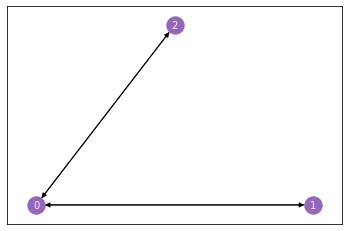

In [24]:
import numpy as np
import networkx as nx

G = nx.DiGraph()
G.add_node("0", pos=(1,1))
G.add_node("1", pos=(4,4))
G.add_node("2", pos=(4,2))
G.add_edge("0", "1")
G.add_edge("1", "0")
G.add_edge("0", "2")
G.add_edge("2", "0")

pos = {'0': (0, 0), '1': (1, 0), '2': (.5, .5)}

nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1)
A = np.asarray(nx.to_numpy_matrix(G))

Our network has three nodes, labeled $1$, $2$, and $3$. Each of these three nodes is either connected or not connected to each of the two other nodes. We'll make a square matrix $A$, with 3 rows and 3 columns, so that each node has its own row and column associated to it.

So, let's fill out the matrix. We start with the first row, which corresponds to the first node, and move along the columns. If there is an edge between the first node and the node whose index matches the current column, put a 1 in the current location. If the two nodes aren't connected, add a 0. When you're done with the first row, move on to the second. Keep going until the whole matrix is filled with 0's and 1's. 

The end result looks like the matrix below. Since the second and third nodes aren't connected, there is a $0$ in locations $A_{2, 1}$ and $A_{1, 2}$. There are also zeroes along the diagonals, since nodes don't have edges with themselves.

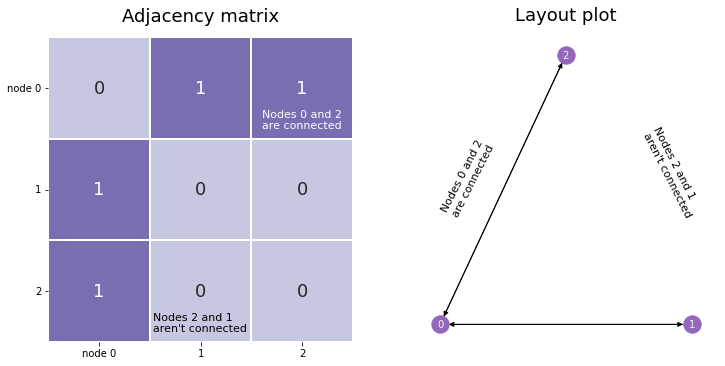

In [25]:
from graphbook_code import heatmap
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12,6))
ax1 = heatmap(A, annot=True, linewidths=.1, cbar=False, ax=axs[0], title="Adjacency matrix $A$", 
               xticklabels=True, yticklabels=True);
ax1.tick_params(axis='y', labelrotation=360)

# ticks
yticks = ax1.get_yticklabels()
yticks[0].set_text('node 0')
ax1.set_yticklabels(yticks)

xticks = ax1.get_xticklabels()
xticks[0].set_text('node 0')
ax1.set_xticklabels(xticks)

ax1.annotate("Nodes 0 and 2 \nare connected", (2.1, 0.9), color='white', fontsize=11)
ax1.annotate("Nodes 2 and 1 \naren't connected", (1.03, 2.9), color='black', fontsize=11)

ax2 = nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1, ax=axs[1])

ax2 = plt.gca()
ax2.text(0, 0.2, s="Nodes 0 and 2 \nare connected", color='black', fontsize=11, rotation=63)
ax2.text(.8, .2, s="Nodes 2 and 1 \naren't connected", color='black', fontsize=11, rotation=-63)
ax2.set_title("Layout plot", fontsize=18)
sns.despine(ax=ax2, left=True, bottom=True)

Although the adjacency matrix is straightforward and easy to understand, it isn't the only way to represent networks.

## The Incidence Matrix

Instead of having values in a symmetric matrix represent possible edges, like with the Adjacency Matrix, we could have rows represent nodes and columns represent edges. This is called the *Incidence Matrix*, and it's useful to know about -- although it won't appear too much in this book. If there are $n$ nodes and $m$ edges, you make an $n \times m$ matrix. Then, to determine whether a node is a member of a given edge, you'd go to that node's row and the edge's column. If the entry is nonzero ($1$ if the network is unweighted), then the node is a member of that edge, and if there's a $0$, the node is not a member of that edge.

You can see the incidence matrix for our network below. Notice that with incidence plots, edges are (generally arbitrarily) assigned indices as well as nodes.

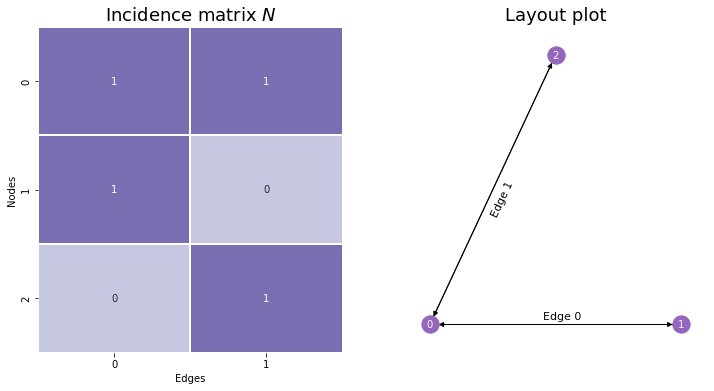

In [26]:
from networkx.linalg.graphmatrix import incidence_matrix
cmap = sns.color_palette("Purples", n_colors=2)

I = incidence_matrix(nx.Graph(A)).toarray().astype(int)

fig, axs = plt.subplots(1, 2, figsize=(12,6))

plot = sns.heatmap(I, annot=True, linewidths=.1, cmap=cmap,
                   cbar=False, xticklabels=True, yticklabels=True, ax=axs[0]);
plot.set_xlabel("Edges")
plot.set_ylabel("Nodes")
plot.set_title("Incidence matrix", fontsize=18)

ax2 = nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1, ax=axs[1])

ax2 = plt.gca()
ax2.text(.24, 0.2, s="Edge 1", color='black', fontsize=11, rotation=65)
ax2.text(.45, 0.01, s="Edge 0", color='black', fontsize=11)
ax2.set_title("Layout plot", fontsize=18)
sns.despine(ax=ax2, left=True, bottom=True)

When networks are large, incidence matrices tend to be extremely sparse -- meaning, their values are mostly 0's. This is because each column must have exactly two nonzero values along its rows: one value for the first node its edge is connected to, and another for the second. Because of this, incidence matrices are usually represented in Python computationally as scipy's *sparse matrices* rather than as numpy arrays, since this data type is much better-suited for matrices which contain mostly zeroes.

You can also add orientation to incidence matrices, even in undirected networks, which we'll discuss next.

## The Oriented Incidence Matrix

The oriented incidence matrix is extremely similar to the normal incidence matrix, except that you assign a direction or orientation to each edge: you define one of its nodes as being the head node, and the other as being the tail. For undirected networks, you can assign directionality arbitrarily. Then, for the column in the incidence matrix corresponding to a given edge, the tail node has a value of $-1$, and the head node has a value of $0$. Nodes who aren't a member of a particular edge are still assigned values of $0$. Although it doesn't have a gold-standard letter assigned to it as a name, we'll call it $N$.

Text(0.9, -0.05, 'Head Node')

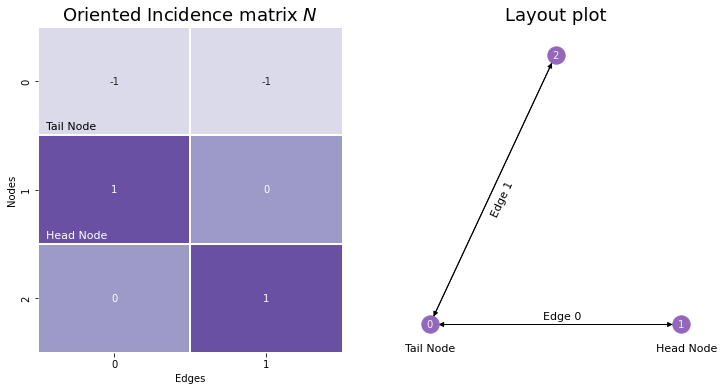

In [28]:
from networkx.linalg.graphmatrix import incidence_matrix
cmap = sns.color_palette("Purples", n_colors=3)

N = incidence_matrix(nx.Graph(A), oriented=True).toarray().astype(int)

fig, axs = plt.subplots(1, 2, figsize=(12,6))

plot = sns.heatmap(N, annot=True, linewidths=.1, cmap=cmap,
                   cbar=False, xticklabels=True, yticklabels=True, ax=axs[0]);
plot.set_xlabel("Edges")
plot.set_ylabel("Nodes")
plot.set_title("Oriented Incidence matrix $N$", fontsize=18)
plot.annotate("Tail Node", (.05, .95), color='black', fontsize=11)
plot.annotate("Head Node", (.05, 1.95), color='white', fontsize=11)

ax2 = nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1, ax=axs[1])

ax2 = plt.gca()
ax2.text(.24, 0.2, s="Edge 1", color='black', fontsize=11, rotation=65)
ax2.text(.45, 0.01, s="Edge 0", color='black', fontsize=11)
ax2.set_title("Layout plot", fontsize=18)
sns.despine(ax=ax2, left=True, bottom=True)
ax2.text(-.1, -.05, s="Tail Node", color='black', fontsize=11)
ax2.text(.9, -.05, s="Head Node", color='black', fontsize=11)

Although we won't use incidence matrices, oriented or otherwise, in this book too much, we introduced them because there's a deep connection between incidence matrices, adjacency matrices, and a matrix representation that we haven't introduced yet called the Laplacian. Before we can explore that connection, we'll discuss one more representation: the degree matrix.

## The Degree Matrix

The degree matrix isn't a full representation of our network, because you wouldn't be able to reconstruct an entire network from a degree matrix. However, it's fairly straightforward and it pops up relatively often as a step in creating other matrices, so the degree matrix is useful to mention. It's just a diagonal matrix with the values along the diagonal corresponding to the number of each edges each node has, also known as the degree of each node.

You can see the degree matrix for our network below. The diagonal element corresponding to node zero has the value of two, since it has two edges; and the rest of the nodes have a value of one, since they each are only connected to the first node.

In [29]:
# Build the degree matrix D
degrees = np.count_nonzero(A, axis=0)
D = np.diag(degrees)

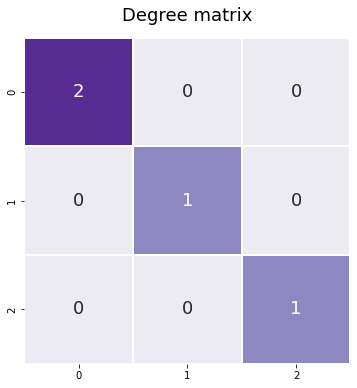

In [19]:
fig, ax = plt.subplots(figsize=(6,6))

D_ax = heatmap(D, annot=True, linewidths=.1, cbar=False, title="Degree matrix $D$", 
               xticklabels=True, yticklabels=True, ax=ax);

## The Laplacian Matrix

The standard, cookie-cutter Laplacian Matrix $L$ is just the adjacency matrix $A$ subtracted from the the degree matrix $D$. 

$L = D - A$

Since the only nonzero values of the degree matrix is along its diagonals, and because the diagonals of an adjacency matrix never contain zeroes if its network doesn't have nodes connected to themselves, the diagonals of the Laplacian are just the degree of each node. The values on the non-diagonals work similarly to the adjacency matrix: they contain a $-1$ if there is an edge between the two nodes, and a $0$ if there is no edge.

The figure below shows you what the Laplacian looks like. Since each node has exactly two edges, the degree matrix is just a diagonal matrix of all twos. The Laplacian looks like the degree matrix, but with -1's in all the locations where an edge exists between nodes $i$ and $j$.

In [50]:
L = D - A

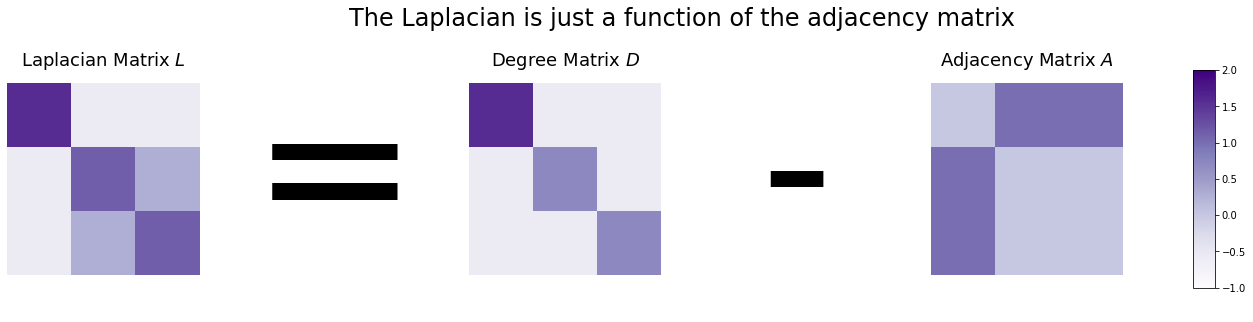

In [51]:
from graphbook_code import heatmap
import seaborn as sns
from matplotlib.colors import Normalize
from graphbook_code import GraphColormap
import matplotlib.cm as cm
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

# First axis (Laplacian)
heatmap(L, ax=axs[0], cbar=False, title="Laplacian Matrix $L$")

# Second axis (-)
axs[1].text(x=.5, y=.5, s="=", fontsize=200, 
            va='center', ha='center')
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
sns.despine(ax=axs[1], left=True, bottom=True)

# Third axis (Degree matrix)

heatmap(D, ax=axs[2], cbar=False, title="Degree Matrix $D$")

# Third axis (=)
axs[3].text(x=.5, y=.5, s="-", fontsize=200,
            va='center', ha='center')
axs[3].get_xaxis().set_visible(False)
axs[3].get_yaxis().set_visible(False)
sns.despine(ax=axs[3], left=True, bottom=True)

# Fourth axis (Laplacian)
heatmap(A, ax=axs[4], cbar=False, title="Adjacency Matrix $A$")


# Colorbar
vmin, vmax = np.array(L).min(), np.array(L).max()
norm = Normalize(vmin=vmin, vmax=vmax)
im = cm.ScalarMappable(cmap=GraphColormap("sequential").color, norm=norm)
fig.colorbar(im, ax=axs, shrink=0.8, aspect=10);

fig.suptitle("The Laplacian is just a function of the adjacency matrix", fontsize=24);

We use the Laplacian in practice because it has a number of interesting mathematical properties, which tend to be useful for analysis. For instance, the magnitude of its second-smallest eigenvalue, called the Fiedler eigenvalue, tells you how well-connected your network is -- and the number of eigenvalues equal to zero is the number of connected components your network has (a connected component is a group of nodes in a network which all have a path to get to each other -- think of it as an island of nodes and edges). Laplacians and adjacency matrices will be used throughout this thesis, and details about when and where one or the other will be used are in the spectral embedding chapter.

### The Connection Between the Laplacian, the Adjacency Matrix, and the Oriented Incidence Matrix

We just figured out that you can derive the Laplacian from only the adjacency matrix: since you can find the degree matrix from just the adjacency matrix, the Laplacian and the adjacency matrix have exactly the same information content.

However, you can also find the Laplacian from the oriented incidence matrix: If your oriented incidence matrix is called $N$, then the Laplacian is $N N^\top$.

In [32]:
N @ N.T

array([[ 2, -1, -1],
       [-1,  1,  0],
       [-1,  0,  1]])

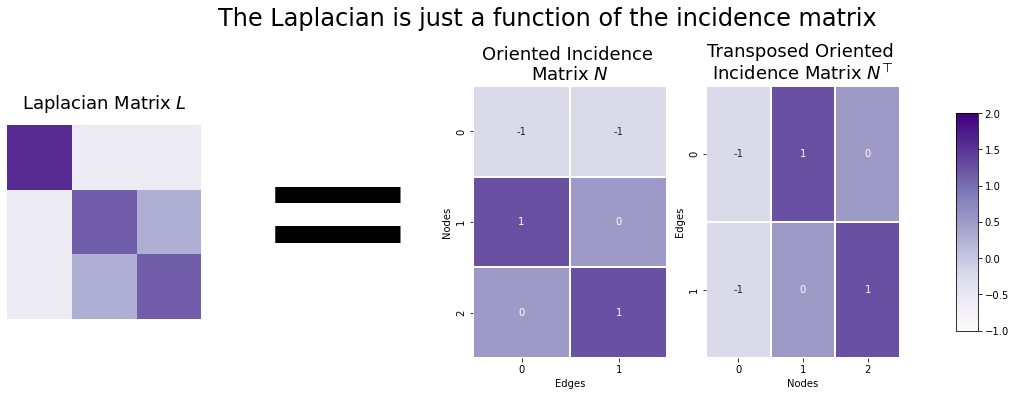

In [46]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# First axis (Laplacian)
heatmap(L, ax=axs[0], cbar=False, title="Laplacian Matrix $L$")

# Second axis (-)
axs[1].text(x=.5, y=.5, s="=", fontsize=200, 
            va='center', ha='center')
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
sns.despine(ax=axs[1], left=True, bottom=True)

# Third axis (Degree matrix)
plot = sns.heatmap(N, annot=True, linewidths=.1, cmap=cmap,
                   cbar=False, xticklabels=True, yticklabels=True, ax=axs[2]);
plot.set_xlabel("Edges")
plot.set_ylabel("Nodes")
plot.set_title("Oriented Incidence \nMatrix $N$", fontsize=18)

# Fourth axis (Laplacian)
# Third axis (Degree matrix)
plot = sns.heatmap(N.T, annot=True, linewidths=.1, cmap=cmap,
                   cbar=False, xticklabels=True, yticklabels=True, ax=axs[3]);
plot.set_xlabel("Nodes")
plot.set_ylabel("Edges")
plot.set_title("Transposed Oriented \nIncidence Matrix " + r"$N^\top$", fontsize=18)


# Colorbar
vmin, vmax = np.array(L).min(), np.array(L).max()
norm = Normalize(vmin=vmin, vmax=vmax)
im = cm.ScalarMappable(cmap=GraphColormap("sequential").color, norm=norm)
fig.colorbar(im, ax=axs, shrink=0.8, aspect=10);

fig.suptitle("The Laplacian is just a function of the incidence matrix", fontsize=24, y=1.1);

As a quick note, it doesn't matter which orientation you choose for the oriented incidence matrix: $NN^\top$ will always equal the Laplacian regardless. 

### The Symmetric Laplacian

There are a few variations on the standard $D-A$ version of the Laplacian which are widely used in practice, and which (confusingly) are often also called the Laplacian. They tend to have similar properties, but are often more generalizable. The Symmetric Laplacian is one such variation. The Symmetric Laplacian is defined by

$L^{sym} = D^{-1/2} L D^{-1/2} = I - D^{-1/2} A D^{-1/2}$, where $I$ is the identity matrix (the square matrix with all zeroes except for ones along the diagonal).

$D^{-1/2} A D^{-1/2}

### The Random-Walk Laplacian